#### Loading and explore data
Summary basic explore data in project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_excel("https://ucarecdn.com/82a291a5-5617-4ca7-aba3-54e1707785c3/retail_data_s.xlsx")
df.head()

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Quantity,UnitPrice
0,13047,536367,2010-12-01 08:34:00,84879,32,1.69
1,13047,536367,2010-12-01 08:34:00,22745,6,2.10
2,13047,536367,2010-12-01 08:34:00,22748,6,2.10
3,13047,536367,2010-12-01 08:34:00,22749,8,3.75
4,13047,536367,2010-12-01 08:34:00,22310,6,1.65


In [2]:
df.describe()

,CustomerID,InvoiceNo,Quantity,UnitPrice
count,91465.000000,91465.000000,91465.000000,91465.000000
mean,15101.770426,560116.483114,12.352386,2.943347
std,1756.168325,13205.742026,40.065201,8.776144
min,12347.000000,536367.000000,1.000000,0.000000
25%,13488.000000,548739.000000,2.000000,1.250000
50%,14944.000000,560841.000000,6.000000,1.690000
75%,16628.000000,571676.000000,12.000000,3.750000
max,18287.000000,581582.000000,2880.000000,1241.980000


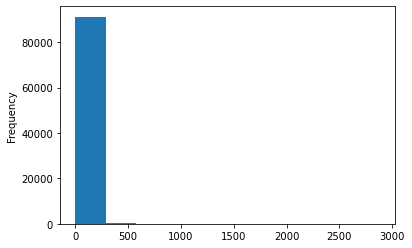

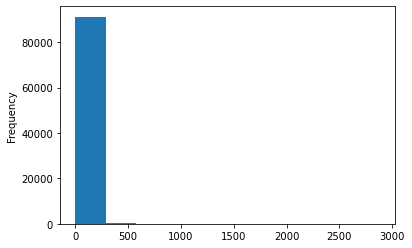

In [7]:
df['Quantity'].plot.hist().get_figure()

In [3]:
df['Quantity'].plot.hist().get_figure().savefig('quantity1.png')
plt.clf()

<Figure size 432x288 with 0 Axes>

In [6]:
df[df['Quantity'] < 12]['Quantity'].plot.hist().get_figure().savefig('quantity2.png')
plt.clf()

<Figure size 432x288 with 0 Axes>

In [8]:
df[df['Quantity'] >= 12]['Quantity'].plot.hist().get_figure().savefig('quantity3.png')
plt.clf()

<Figure size 432x288 with 0 Axes>

In [9]:
df[df['Quantity'] >= 500]['Quantity'].plot.hist().get_figure().savefig('quantity4.png')
plt.clf()

<Figure size 432x288 with 0 Axes>

In [10]:
filter = df['UnitPrice'] != 0
df = df.loc[filter]
df.describe()

,CustomerID,InvoiceNo,Quantity,UnitPrice
count,91453.000000,91453.000000,91453.000000,91453.000000
mean,15101.926137,560116.346965,12.352214,2.943733
std,1756.155070,13205.343483,40.067608,8.776655
min,12347.000000,536367.000000,1.000000,0.040000
25%,13488.000000,548739.000000,2.000000,1.250000
50%,14944.000000,560841.000000,6.000000,1.690000
75%,16628.000000,571676.000000,12.000000,3.750000
max,18287.000000,581582.000000,2880.000000,1241.980000


In [11]:
df['UnitPrice'].plot.hist().get_figure().savefig('unitprice1.png')
plt.clf()

<Figure size 432x288 with 0 Axes>

In [12]:
stock_codes_grouped = (df
                       .groupby("StockCode")
                       .agg({'UnitPrice' : ['min', 'mean', 'max']})
                       .sort_values([('UnitPrice', 'max')])
)
print(stock_codes_grouped.head(10))
print(stock_codes_grouped.tail(10))

          UnitPrice                
                min      mean   max
StockCode                          
16045          0.04  0.040000  0.04
16259          0.08  0.080000  0.08
17136A         0.08  0.080000  0.08
17038          0.07  0.085000  0.10
16161G         0.10  0.100000  0.10
20668          0.10  0.119474  0.12
21402          0.12  0.120000  0.12
21401          0.12  0.120000  0.12
16049          0.12  0.120000  0.12
47013C         0.12  0.120000  0.12
          UnitPrice                     
                min        mean      max
StockCode                               
84632         59.95   59.950000    59.95
22929         65.00   65.000000    65.00
22823        110.00  117.500000   125.00
22827        145.00  159.285714   165.00
22828        145.00  155.000000   165.00
22826         85.00  125.000000   195.00
22655        125.00  176.000000   295.00
22656        125.00  149.285714   295.00
POST           4.00   22.568049   300.00
M              0.08   91.965143  1241.98

In [13]:
filter = df['StockCode'] == "M"
len(df[filter])

70

In [14]:
filter = df['StockCode'] == "POST"
len(df[filter])

205

In [15]:
codes = ["M", "POST"]
filter = df['StockCode'].isin(codes)
df = df[~filter]
df.describe()

,CustomerID,InvoiceNo,Quantity,UnitPrice
count,91178.000000,91178.000000,91178.000000,91178.000000
mean,15107.486707,560121.814637,12.329465,2.831267
std,1754.016176,13203.249840,39.399646,4.437374
min,12347.000000,536367.000000,1.000000,0.040000
25%,13488.000000,548739.000000,2.000000,1.060000
50%,14968.000000,560841.000000,6.000000,1.690000
75%,16628.000000,571676.000000,12.000000,3.450000
max,18287.000000,581582.000000,2880.000000,295.000000


In [16]:
# calculate revenue
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df.sort_values("Revenue", ascending = False)

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Quantity,UnitPrice,Revenue
58800,17450,567423,2011-09-20 11:05:00,23243,1412,5.06,7144.72
8789,17450,540689,2011-01-11 08:43:00,22470,1284,3.21,4121.64
90554,15195,581115,2011-12-07 12:20:00,22413,1404,2.75,3861.00
58794,17450,567423,2011-09-20 11:05:00,23113,756,5.06,3825.36
58798,17450,567423,2011-09-20 11:05:00,22722,852,4.25,3621.00
...,...,...,...,...,...,...,...
77904,16386,575856,2011-11-11 12:28:00,16219,2,0.06,0.12
22683,18116,548711,2011-04-03 14:24:00,47013A,1,0.12,0.12
69729,17571,572103,2011-10-20 15:57:00,16048,1,0.12,0.12
56029,14606,565846,2011-09-07 12:41:00,20668,1,0.12,0.12


In [17]:
df['Revenue'].describe()

count    91178.000000
mean        20.890897
std         76.976394
min          0.060000
25%          4.250000
50%         11.800000
75%         19.500000
max       7144.720000
Name: Revenue, dtype: float64

In [18]:
# remember export data after clean for later use
filename = "retail_data_clean.csv"
df.to_csv(filename, index = False)
print("File {filename} written successfully".format(filename = filename))

File retail_data_clean.csv written successfully
